Import the neccessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt

Data Loading

In [38]:
try:
    df = pd.read_csv("coin_Aave.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'coin_Aave.csv' was not found. Please make sure it is in the same directory")
    exit()
df.head()

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


Data Preprocessing

In [39]:
# Check for missing value
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)

# Convert the data to a simple numerical ordinal value for the model to use
df["date"] = pd.to_datetime(df["date"]).apply(lambda x: x.toordinal())

Missing Values
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Duplicated Rows
0


Feature Engineering

In [40]:
# We define our features (X) and our target (y)
# The features are the columns we will use to make predictions
# The target is the column we want to predict ("close")

features = ["high","low","open","volume"]
target = "close"

# Define the feature (X) and the target (y)
b = df["high"]

X = df[features]
y = df[target]

Data Splitting

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Data Scaling

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Model Training

In [43]:
# We will create a dictionaty to store our models and their names

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(alpha=0.1), # alpha is a regularization paramet
    "ElasticNet Regression":ElasticNet(alpha=0.1,l1_ratio=0.5),
    "SVR": SVR(kernel="rbf") # SVR with a radical basis function kernel
}

# We'll store the results for comparison
results = {}

Model Evaluation

In [44]:
print("-----Model Evaluation-----")
for name, model in models.items():
    print(f"Training {name}....")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the Results
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

    # Print the Results
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared: {r2:.2f}")

-----Model Evaluation-----
Training Linear Regression....
Mean Absolute Error (MAE): 8.36
Mean Squared Error (MSE): 199.22
R-Squared: 0.99
Training Ridge Regression....
Mean Absolute Error (MAE): 9.00
Mean Squared Error (MSE): 190.35
R-Squared: 0.99
Training Lasso Regression....
Mean Absolute Error (MAE): 8.62
Mean Squared Error (MSE): 196.90
R-Squared: 0.99
Training ElasticNet Regression....
Mean Absolute Error (MAE): 9.61
Mean Squared Error (MSE): 217.72
R-Squared: 0.99
Training SVR....
Mean Absolute Error (MAE): 93.28
Mean Squared Error (MSE): 11850.82
R-Squared: 0.56


Find the Best Model

In [45]:
# We find the best model based on the R-squared value, which indicates how
# well the model explains the variance in the data (closer to 1 is better)

best_model_name = ""
best_r2 = -np.inf

for name,metrics in results.items():
    if metrics["R2"] > best_r2:
        best_r2 = metrics["R2"]
        best_model_name = name

print("Model Comparison Summary")
print(f"The best performing model is {best_model_name}")
print(f"It achieved an R-squared score of {best_r2:.2f}")

Model Comparison Summary
The best performing model is Ridge Regression
It achieved an R-squared score of 0.99


Visualization of Results

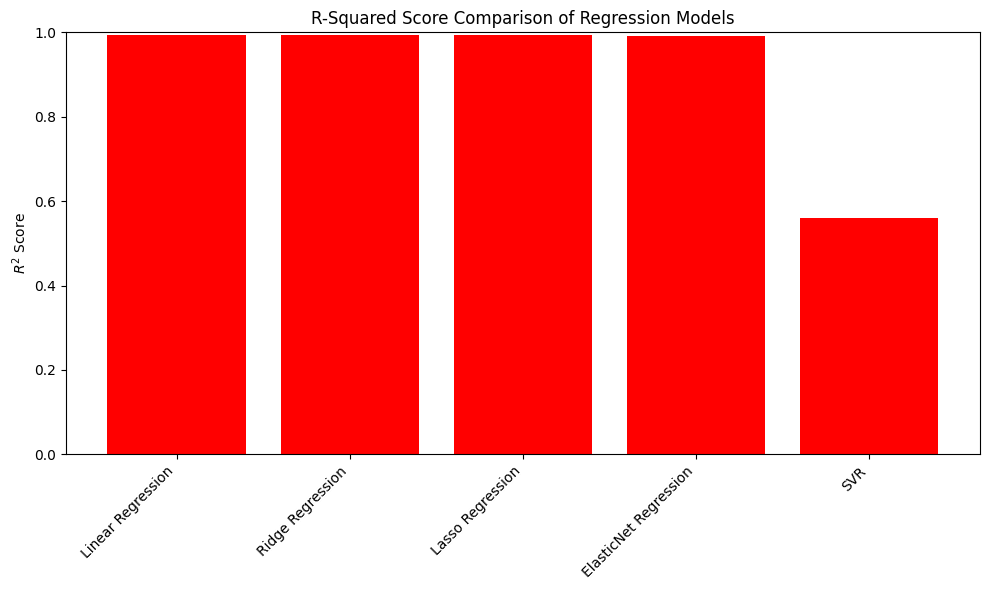

In [46]:
fig,ax = plt.subplots(figsize=(10,6))
model_names = list(results.keys())
r2_scores = [results[name]["R2"] for name in model_names]
plt.bar(model_names,r2_scores,color="red")
plt.ylabel("$R^2$ Score")
plt.title("R-Squared Score Comparison of Regression Models")
plt.ylim(0,1) # R2 Score is between 0 and 1
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

Use the Best Model for Prediction based on User Input

In [47]:
# This part of the code prompts the user to input values for all features to make a prediction
print("Interactive Prediction using Ridge Regression")
print("Enter the following values to predict the Close price of Aave Coin")

while True:
    try:
        high_price_input = input("Enter the High Price (or type 'exit' to quit):")
        if high_price_input == "exit":
            break
        high_price = float(high_price_input)
        low_price = float(input("Enter the Low Price:"))
        open_price = float(input("Enter the Open Price:"))
        volume_price = float(input("Enter the Trading Volume:"))

        # We must reshape the input to a 2D array for a single sample
        new_prices = np.array([[high_price,low_price,open_price,volume_price]])

        predicted_new_prices = models["Ridge Regression"].predict(new_prices)

        print(f"For the given prices, the predicted Close price is:{predicted_new_prices[0]:.5f}")
    except ValueError:
        print("Invalid input. Please enter valid numbers")

Interactive Prediction using Ridge Regression
Enter the following values to predict the Close price of Aave Coin
